In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv',header = None)
data.columns = ['Month','Passengers']
data["Month"] = pd.to_datetime(data["Month"])
data = data.set_index("Month")
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Time Series Analysis
### Plot Time Series Data

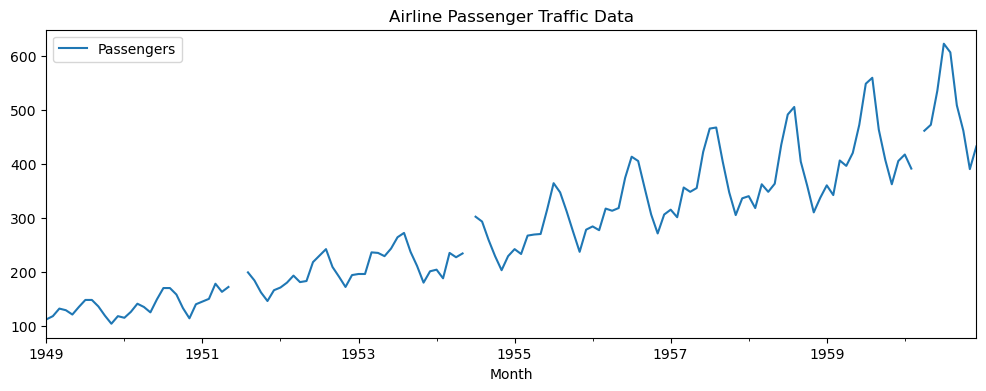

In [4]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Traffic Data")
plt.show(block = False)

## Missing Value Imputation
### Mean Imputation

In [15]:
data = data.assign(passengers_mean_imputation = data['Passengers'].fillna(data['Passengers'].mean()) )

In [11]:
data.loc[pd.isnull(data['Passengers'])]

,Passengers,passengers_impute_mean
Month,,
1951-06-01,NaN,280.735714
1951-07-01,NaN,280.735714
1954-06-01,NaN,280.735714
1960-03-01,NaN,280.735714


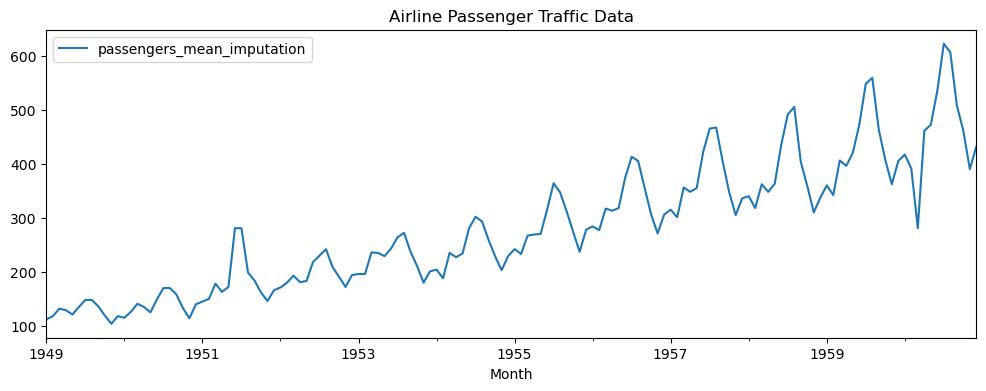

In [16]:
data['passengers_mean_imputation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Traffic Data")
plt.show(block = False)

In [12]:
data = data.assign(passengers_linear_interpoloation = data['Passengers'].interpolate(method = 'linear') )

In [13]:
data.loc[pd.isnull(data['Passengers'])]

,Passengers,passengers_impute_mean,passengers_linear_interpoloation
Month,,,
1951-06-01,NaN,280.735714,181.0
1951-07-01,NaN,280.735714,190.0
1954-06-01,NaN,280.735714,268.0
1960-03-01,NaN,280.735714,426.0


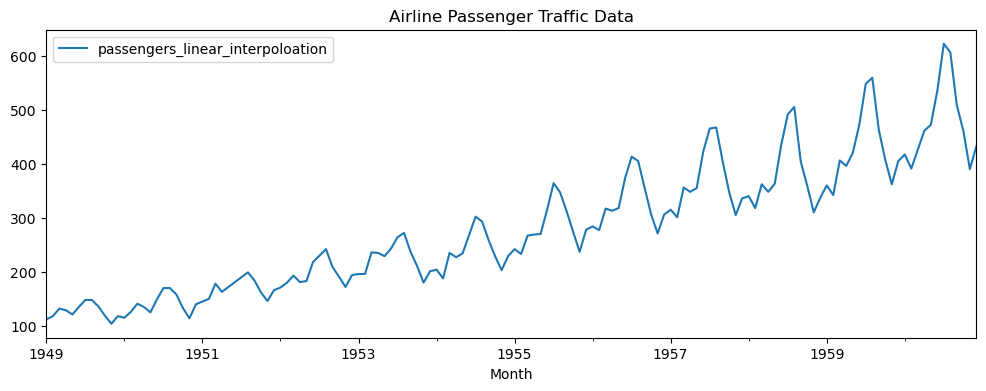

In [17]:
data['passengers_linear_interpoloation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline Passenger Traffic Data")
plt.show(block = False)

### Test Cases

In [20]:
metrail = pd.read_csv('Metrail+dataset.csv')
print(metrail.shape)
print(metrail.info())
metrail.head()

(159, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             159 non-null    object 
 1   Travellers('000)  148 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB
None


,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [27]:
metrail.rename(columns = {"Travellers('000)":"Travellers"},inplace = True)

In [28]:
metrail.loc[pd.isnull(metrail["Travellers"])]

,Month,Travellers
4,May-91,NaN
12,Jan-92,NaN
16,May-92,NaN
26,Mar-93,NaN
31,Aug-93,NaN
73,Feb-97,NaN
80,Sep-97,NaN
96,Jan-99,NaN
105,Oct-99,NaN
135,Apr-02,NaN


In [29]:
metrail = metrail.assign(previous_value_imputation = metrail["Travellers"].ffill())

In [34]:
metrail = metrail.assign(previous_value_imputation_pad = metrail["Travellers"].fillna(method ='pad'))

In [35]:
metrail.loc[pd.isnull(metrail["Travellers"])]

,Month,Travellers,previous_value_imputation,previous_value_imputation_pad
4,May-91,NaN,1825.0,1825.0
12,Jan-92,NaN,1831.0,1831.0
16,May-92,NaN,1973.0,1973.0
26,Mar-93,NaN,1632.0,1632.0
31,Aug-93,NaN,1949.0,1949.0
73,Feb-97,NaN,1412.0,1412.0
80,Sep-97,NaN,2021.0,2021.0
96,Jan-99,NaN,1861.0,1861.0
105,Oct-99,NaN,1622.0,1622.0
135,Apr-02,NaN,2032.0,2032.0


In [31]:
metrail["previous_value_imputation"].mean()

1838.685534591195

In [36]:
metrail = metrail.assign(next_value_imputation = metrail["Travellers"].bfill())

In [37]:
metrail.loc[pd.isnull(metrail["Travellers"])]

,Month,Travellers,previous_value_imputation,previous_value_imputation_pad,next_value_imputation
4,May-91,NaN,1825.0,1825.0,1879.0
12,Jan-92,NaN,1831.0,1831.0,1574.0
16,May-92,NaN,1973.0,1973.0,1637.0
26,Mar-93,NaN,1632.0,1632.0,1974.0
31,Aug-93,NaN,1949.0,1949.0,1690.0
73,Feb-97,NaN,1412.0,1412.0,1721.0
80,Sep-97,NaN,2021.0,2021.0,1790.0
96,Jan-99,NaN,1861.0,1861.0,1562.0
105,Oct-99,NaN,1622.0,1622.0,1864.0
135,Apr-02,NaN,2032.0,2032.0,2086.0


In [38]:
metrail["next_value_imputation"].mean()

1834.446540880503

In [39]:
metrail = metrail.assign(linear_interpolate_imputation = metrail["Travellers"].interpolate(method ='linear'))

In [40]:
metrail.loc[pd.isnull(metrail["Travellers"])]

,Month,Travellers,previous_value_imputation,previous_value_imputation_pad,next_value_imputation,linear_interpolate_imputation
4,May-91,NaN,1825.0,1825.0,1879.0,1852.0
12,Jan-92,NaN,1831.0,1831.0,1574.0,1702.5
16,May-92,NaN,1973.0,1973.0,1637.0,1805.0
26,Mar-93,NaN,1632.0,1632.0,1974.0,1803.0
31,Aug-93,NaN,1949.0,1949.0,1690.0,1819.5
73,Feb-97,NaN,1412.0,1412.0,1721.0,1566.5
80,Sep-97,NaN,2021.0,2021.0,1790.0,1905.5
96,Jan-99,NaN,1861.0,1861.0,1562.0,1711.5
105,Oct-99,NaN,1622.0,1622.0,1864.0,1743.0
135,Apr-02,NaN,2032.0,2032.0,2086.0,2059.0


In [41]:
metrail["linear_interpolate_imputation"].mean()

1836.566037735849

In [46]:
metrail = metrail.assign(rolling_imputation = metrail["Travellers"].rolling(5).mean())

In [47]:
metrail.loc[pd.isnull(metrail["Travellers"])]

,Month,Travellers,previous_value_imputation,previous_value_imputation_pad,next_value_imputation,linear_interpolate_imputation,rolling_imputation
4,May-91,NaN,1825.0,1825.0,1879.0,1852.0,NaN
12,Jan-92,NaN,1831.0,1831.0,1574.0,1702.5,NaN
16,May-92,NaN,1973.0,1973.0,1637.0,1805.0,NaN
26,Mar-93,NaN,1632.0,1632.0,1974.0,1803.0,NaN
31,Aug-93,NaN,1949.0,1949.0,1690.0,1819.5,NaN
73,Feb-97,NaN,1412.0,1412.0,1721.0,1566.5,NaN
80,Sep-97,NaN,2021.0,2021.0,1790.0,1905.5,NaN
96,Jan-99,NaN,1861.0,1861.0,1562.0,1711.5,NaN
105,Oct-99,NaN,1622.0,1622.0,1864.0,1743.0,NaN
135,Apr-02,NaN,2032.0,2032.0,2086.0,2059.0,NaN
